# Performace in 5 different dataset

This note book is to evaluate the performance of my implementation of logistic regression. 5 datasets with different columns and classification will be applied.

* 2F_2C.csv : 2 features and 2 classes
* 3F_3C.csv : 3 features and 3 classes
* 5F_2C.csv : 5 features and 2 classes
* 5F_3C.csv : 5 features and 3 classes
* 5F_4C.csv : 5 features and 4 classes


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split

from LogisticRegression import LogisticRegression as MyLR

from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score

In [2]:
# Helper functions:
# split input dataset to train/test 
def split_data(data):
    features = data.iloc[:, :-1]
    target = data.iloc[:, -1]
    train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=1)
    return (train_x, test_x, train_y, test_y)

# Create my implementation of logistic regression, fit the training data and make a prediction
def get_lr_hyp(train_x, test_x, train_y):
    lr = MyLR()
    lr.fit(train_x, train_y)
    return lr.predict(test_x)

## 2F_2C.csv


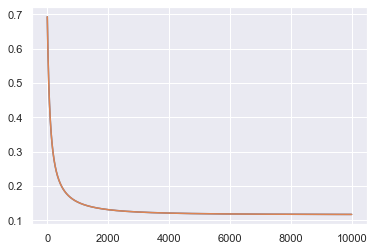

In [3]:
data_2f2c = pd.read_csv('2F_2C.csv')
(train_x, test_x, train_y, test_y) = split_data(data_2f2c)

hyp = get_lr_hyp(train_x, test_x, train_y)

evs_2f2c = explained_variance_score(test_y, hyp)
acc_2f2c = accuracy_score(test_y, hyp)

# Costs

## 3F_3C.csv

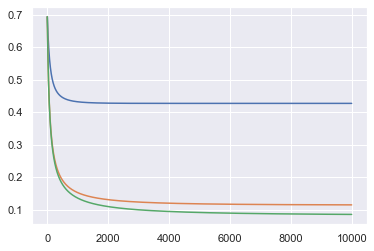

In [4]:
data_3f3c = pd.read_csv('3F_3C.csv')
(train_x, test_x, train_y, test_y) = split_data(data_3f3c)

hyp = get_lr_hyp(train_x, test_x, train_y)

evs_3f3c = explained_variance_score(test_y, hyp)
acc_3f3c = accuracy_score(test_y, hyp)

# Costs

## 5F_2C.csv

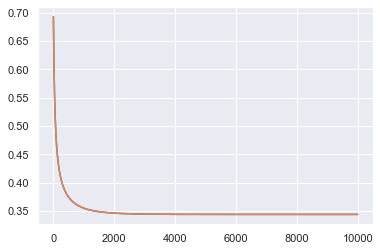

In [5]:
data_5f2c = pd.read_csv('5F_2C.csv')
(train_x, test_x, train_y, test_y) = split_data(data_5f2c)

hyp = get_lr_hyp(train_x, test_x, train_y)

evs_5f2c = explained_variance_score(test_y, hyp)
acc_5f2c = accuracy_score(test_y, hyp)

# Costs

## 5F_3C.csv

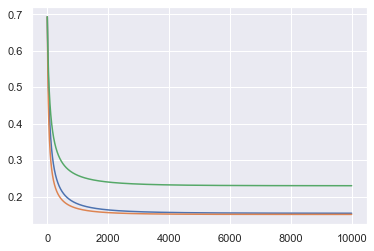

In [6]:
data_5f3c = pd.read_csv('5F_3C.csv')
(train_x, test_x, train_y, test_y) = split_data(data_5f3c)

hyp = get_lr_hyp(train_x, test_x, train_y)

evs_5f3c = explained_variance_score(test_y, hyp)
acc_5f3c = accuracy_score(test_y, hyp)

# Costs

## 5F_4C.csv

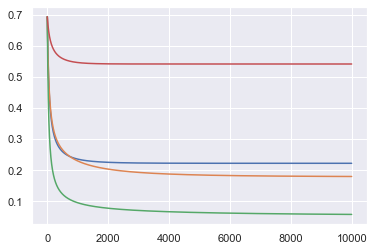

In [7]:
data_5f4c = pd.read_csv('5F_4C.csv')
(train_x, test_x, train_y, test_y) = split_data(data_5f4c)

hyp = get_lr_hyp(train_x, test_x, train_y)

evs_5f4c = explained_variance_score(test_y, hyp)
acc_5f4c = accuracy_score(test_y, hyp)

# Costs

# Comparison
As the following graph shows, it performs well in terms of accuracy, which means most of the predicted values were correct. Although the explained variance scores are not that remarkable, I believe it's good enough in most cases. However, it's interesting that it got a relatively bad variance score in 5F2C. I thought it will get more accurate results in a 2-class dataset because there are only 2 classes to predict. The potential reason that I got the wrong anticipation is the dataset is hard to predict. In other words, maybe even sklearn's logistic regression cannot get a perfect result. 

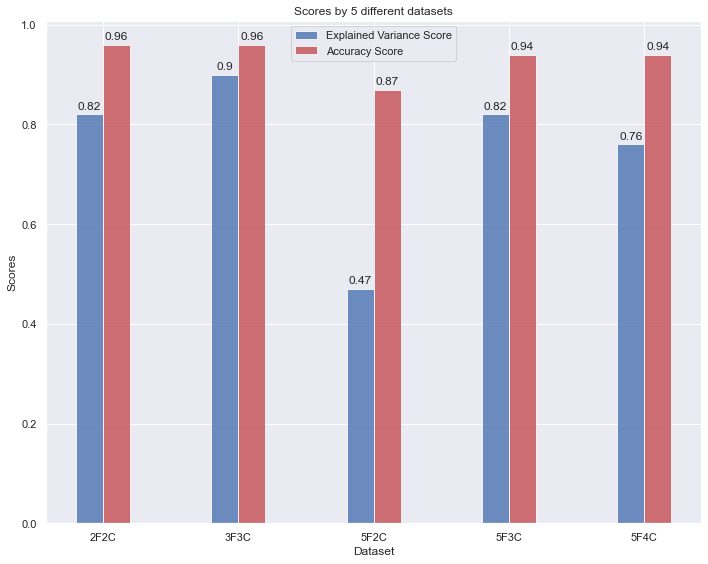

In [8]:
# round a list of float to 2 digits
def round_2(num_list):
    return [round(num, 2) for num in num_list]

# data to plot
labels = ['2F2C', '3F3C', '5F2C', '5F3C', '5F4C']
evs = round_2([evs_2f2c, evs_3f3c, evs_5f2c, evs_5f3c, evs_5f4c])
acc = round_2([acc_2f2c, acc_3f3c, acc_5f2c, acc_5f3c, acc_5f4c])

#round_to_tenths = [round(num, 1) for num in a_list]

x = np.arange(len(labels))
bar_width = 0.2
opacity = 0.8

fig, ax = plt.subplots(figsize=(10,8))

rects1 = ax.bar(x - bar_width/2, 
                evs, 
                bar_width,
                alpha=opacity,
                color='b',
                label='Explained Variance Score')


rects2 = ax.bar(x + bar_width/2, 
                acc, 
                bar_width,
                alpha=opacity,
                color='r',
                label='Accuracy Score')

ax.set_xlabel('Dataset')
ax.set_ylabel('Scores')
ax.set_title('Scores by 5 different datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.tight_layout()
plt.show()

# Sklearn's Logistic Regression
In order to prove my perforamce is not that bad, let's evaluate the prediction result from Sklearn's Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# Helper Function
def sklearn_lr(data):
    (train_x, test_x, train_y, test_y) = split_data(data)
    clf = LogisticRegression()
    clf.fit(train_x, train_y)
    hyp = clf.predict(test_x)
    evs = explained_variance_score(test_y, hyp)
    acc = accuracy_score(test_y, hyp)
    return(evs, acc)

In [10]:
data_2f2c = pd.read_csv('2F_2C.csv')
data_3f3c = pd.read_csv('3F_3C.csv')
data_5f2c = pd.read_csv('5F_2C.csv')
data_5f3c = pd.read_csv('5F_3C.csv')
data_5f4c = pd.read_csv('5F_4C.csv')

(evs_2f2c, acc_2f2c) = sklearn_lr(data_2f2c)
(evs_3f3c, acc_3f3c) = sklearn_lr(data_3f3c)
(evs_5f2c, acc_5f2c) = sklearn_lr(data_5f2c)
(evs_5f3c, acc_5f3c) = sklearn_lr(data_5f3c)
(evs_5f4c, acc_5f4c) = sklearn_lr(data_5f4c)

# Conclusion
As I mentioned, the 5F2C may not have a well distribution and classification. The LR from sklearn's does not also get a much better variance score. Moreover, the other metrics are quite the same as mine. Therefore, my implementation is acceptable.

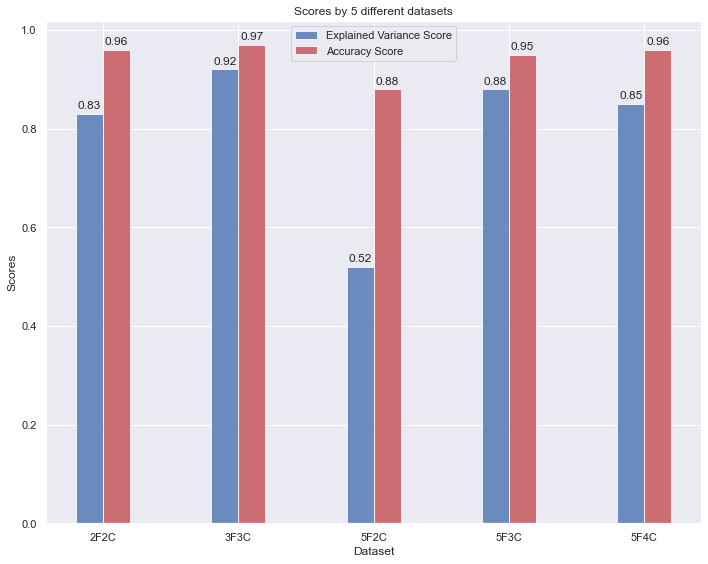

In [11]:
# data to plot
labels = ['2F2C', '3F3C', '5F2C', '5F3C', '5F4C']
evs = round_2([evs_2f2c, evs_3f3c, evs_5f2c, evs_5f3c, evs_5f4c])
acc = round_2([acc_2f2c, acc_3f3c, acc_5f2c, acc_5f3c, acc_5f4c])

#round_to_tenths = [round(num, 1) for num in a_list]

x = np.arange(len(labels))
bar_width = 0.2
opacity = 0.8

fig, ax = plt.subplots(figsize=(10,8))

rects1 = ax.bar(x - bar_width/2, 
                evs, 
                bar_width,
                alpha=opacity,
                color='b',
                label='Explained Variance Score')


rects2 = ax.bar(x + bar_width/2, 
                acc, 
                bar_width,
                alpha=opacity,
                color='r',
                label='Accuracy Score')

ax.set_xlabel('Dataset')
ax.set_ylabel('Scores')
ax.set_title('Scores by 5 different datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.tight_layout()
plt.show()